In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
new_data = pd.read_csv("/Volumes/TwoTeras/Resources/new_data.csv")

In [3]:
new_data.head()

,Event_Index,Event_Index_s,Pre_Post_Effect,Building_Effect,Agent_Effect,Match,ID,Session,predicted_entropy,lower,upper,Pre_Post_Label,Event_Bin
0,1.000000,-1.468578,-0.5,-0.249336,0.041856,-0.249336,new_ID,new_Session,0.625579,0.337366,0.878192,Pre,0-3
1,1.747475,-1.412566,-0.5,-0.249336,0.041856,-0.249336,new_ID,new_Session,0.626576,0.332131,0.879796,Pre,0-3
2,2.494949,-1.356553,-0.5,-0.249336,0.041856,-0.249336,new_ID,new_Session,0.626918,0.335565,0.880540,Pre,0-3
3,3.242424,-1.300541,-0.5,-0.249336,0.041856,-0.249336,new_ID,new_Session,0.626839,0.329987,0.875714,Pre,3-10
4,3.989899,-1.244528,-0.5,-0.249336,0.041856,-0.249336,new_ID,new_Session,0.625189,0.330393,0.878289,Pre,3-10


In [4]:
new_data.Event_Index.max()

75.0

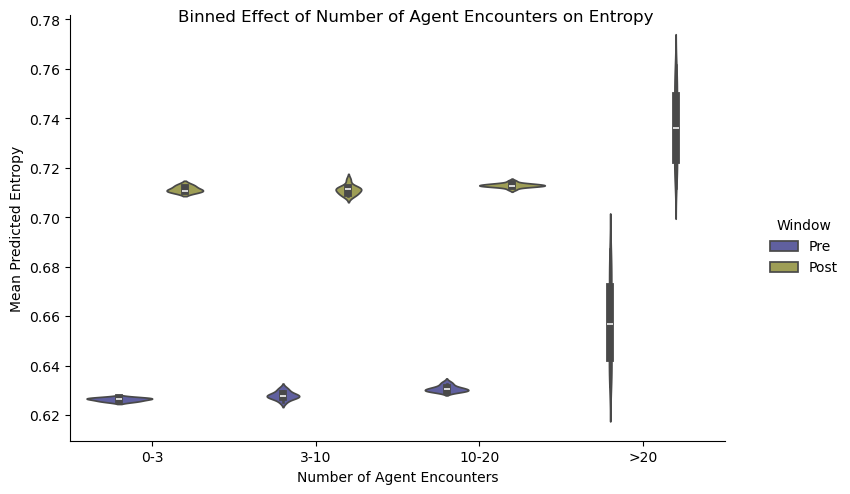

In [5]:


# Define the bin order
bin_order = ["0-3", "3-10", "10-20", ">20"]
new_data["Event_Bin"] = pd.Categorical(new_data["Event_Bin"], categories=bin_order, ordered=True)

# Define Pre/Post order
new_data["Pre_Post_Label"] = pd.Categorical(new_data["Pre_Post_Label"], categories=["Pre", "Post"], ordered=True)

# Create the categorical plot
g = sns.catplot(
    data=new_data,
    x="Event_Bin",
    y="predicted_entropy",
    hue="Pre_Post_Label",
    kind="violin",
    palette="gist_stern",
    errorbar="sd",  # Uses standard error for error bars
    height=5, aspect=1.5
)

# Customize the plot
g.set_axis_labels("Number of Agent Encounters", "Mean Predicted Entropy")
g.fig.suptitle("Binned Effect of Number of Agent Encounters on Entropy")
g.legend.set_title("Window")

# Show the plot
plt.show()


/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_3406/2976241424.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  new_data["Event_Bin"] = pd.Categorical(new_data["Event_Bin"].replace({"0-3": "1-3"}), categories=bin_order, ordered=True)


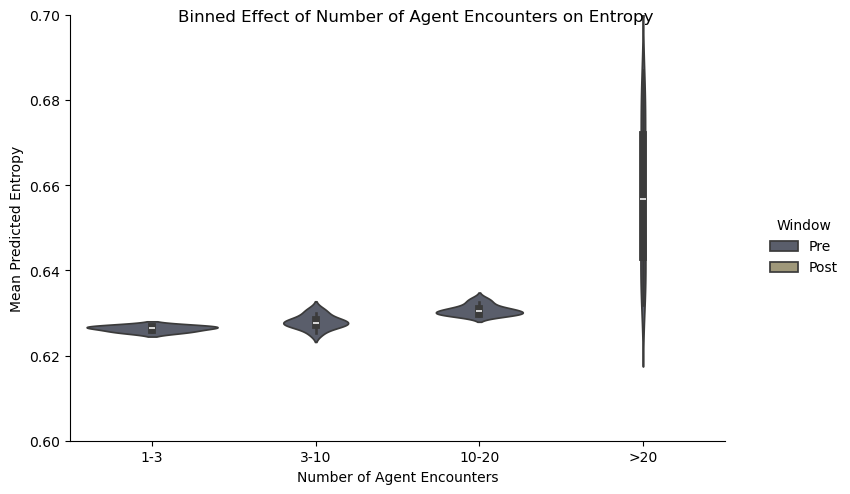

In [6]:


# Define the bin order (renaming "0-3" to "1-3")
bin_order = ["1-3", "3-10", "10-20", ">20"]
new_data["Event_Bin"] = pd.Categorical(new_data["Event_Bin"].replace({"0-3": "1-3"}), categories=bin_order, ordered=True)

# Define Pre/Post order
new_data["Pre_Post_Label"] = pd.Categorical(new_data["Pre_Post_Label"], categories=["Pre", "Post"], ordered=True)

# Create the categorical plot
g = sns.catplot(
    data=new_data,
    x="Event_Bin",
    y="predicted_entropy",
    hue="Pre_Post_Label",
    kind="violin",
    palette="cividis",
    errorbar="sd",  # Uses standard deviation for error bars
    height=5, aspect=1.5, 
    dodge=False  # Ensures categories are spaced further apart
)

# Set y-axis limit from 0 to 1
g.ax.set_ylim(0.6, 0.7)

# Customize x-axis labels
g.set_axis_labels("Number of Agent Encounters", "Mean Predicted Entropy")
g.fig.suptitle("Binned Effect of Number of Agent Encounters on Entropy")
g.legend.set_title("Window")


plt.savefig("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/Entropy_Prediction.png", dpi=900, bbox_inches="tight")
# Show the plot
plt.show()


In [7]:
# Load the dataset
contrast_samples = pd.read_csv("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/predicted_entropy_contrasts_samples.csv")

In [8]:
contrast_samples.head()

,Contrast,Predicted_Contrast_Logit,Lower_CI,Upper_CI
0,Congruent - Acontextual,-0.141568,-0.181505,-0.103302
1,Incongruent - Acontextual,0.012885,-0.023848,0.051001
2,Incongruent - Congruent,0.154165,0.099173,0.206560


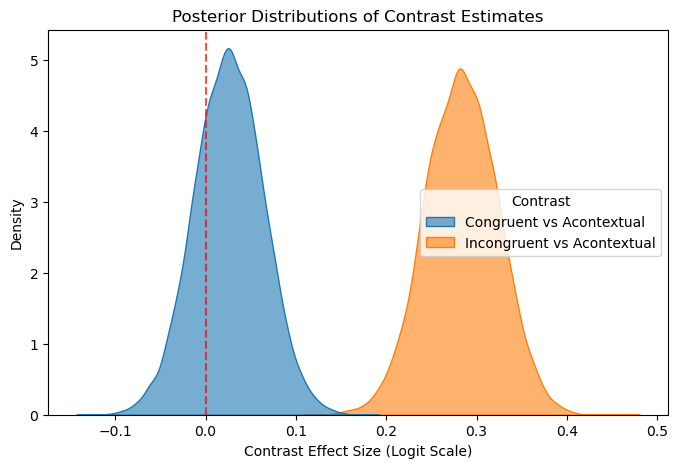

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the posterior contrast samples
file_path = "/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/posterior_contrasts.csv"
contrast_data = pd.read_csv(file_path)

# Set up the ridge plot
plt.figure(figsize=(8, 5))
sns.kdeplot(data=contrast_data, x="Estimate", hue="Contrast", fill=True, alpha=0.6)

# Add labels and title
plt.axvline(x=0, linestyle="dashed", color="red", alpha=0.7)  # Reference line at 0
plt.title("Posterior Distributions of Contrast Estimates")
plt.xlabel("Contrast Effect Size (Logit Scale)")
plt.ylabel("Density")
#plt.legend(title="Contrast Type")

# Show the plot
plt.show()


In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the updated posterior contrast samples
file_path = "/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/posterior_contrasts_with_intercept.csv"
contrast_data = pd.read_csv(file_path)

# Define inverse logit function
def inv_logit(x):
    return np.exp(x) / (1 + np.exp(x))

# Convert logit contrasts into response scale (final entropy values)
contrast_data["Estimate_Response"] = inv_logit(contrast_data["Estimate_Logit"])

# Compute summary statistics (mean and 95% credible interval)
summary_stats = contrast_data.groupby("Contrast")["Estimate_Response"].agg(
    mean="mean",
    lower=lambda x: np.percentile(x, 2.5),
    upper=lambda x: np.percentile(x, 97.5)
).reset_index()

# Save transformed data for further use
contrast_data.to_csv("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/posterior_contrasts_corrected.csv", index=False)

# Print summary to verify
print(summary_stats)


                     Contrast      mean     lower     upper
0    Congruent_vs_Acontextual  0.705011  0.692117  0.717661
1  Incongruent_vs_Acontextual  0.726763  0.714437  0.738747


In [11]:
contrast_data.head()

,Contrast,Estimate_Logit,Estimate_Response
0,Congruent_vs_Acontextual,0.855721,0.701766
1,Incongruent_vs_Acontextual,1.014540,0.733908
2,Congruent_vs_Acontextual,0.901429,0.711243
3,Incongruent_vs_Acontextual,1.000969,0.731249
4,Congruent_vs_Acontextual,0.912159,0.713442


/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_3406/3656467425.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Contrast Type")


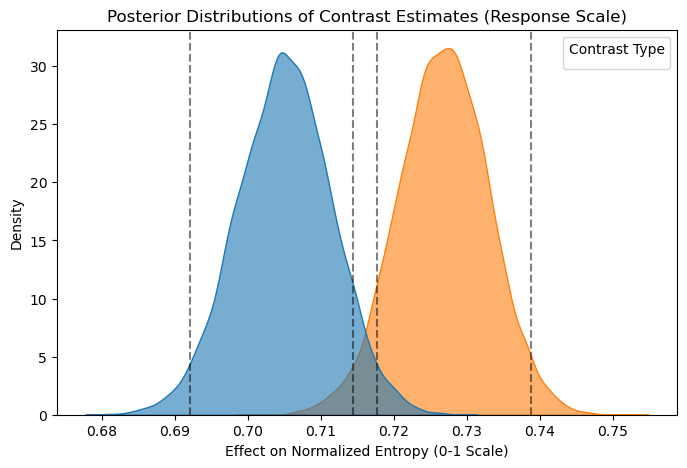

In [12]:
# Set up the ridge plot for posterior distributions
plt.figure(figsize=(8, 5))
sns.kdeplot(data=contrast_data, x="Estimate_Response", hue="Contrast", fill=True, alpha=0.6)

# Add vertical lines for 95% credible intervals
for _, row in summary_stats.iterrows():
    plt.axvline(x=row["lower"], linestyle="dashed", color="black", alpha=0.5)
    plt.axvline(x=row["upper"], linestyle="dashed", color="black", alpha=0.5)

# Customize the plot
plt.title("Posterior Distributions of Contrast Estimates (Response Scale)")
plt.xlabel("Effect on Normalized Entropy (0-1 Scale)")
plt.ylabel("Density")
plt.legend(title="Contrast Type")

# Show the plot
plt.show()


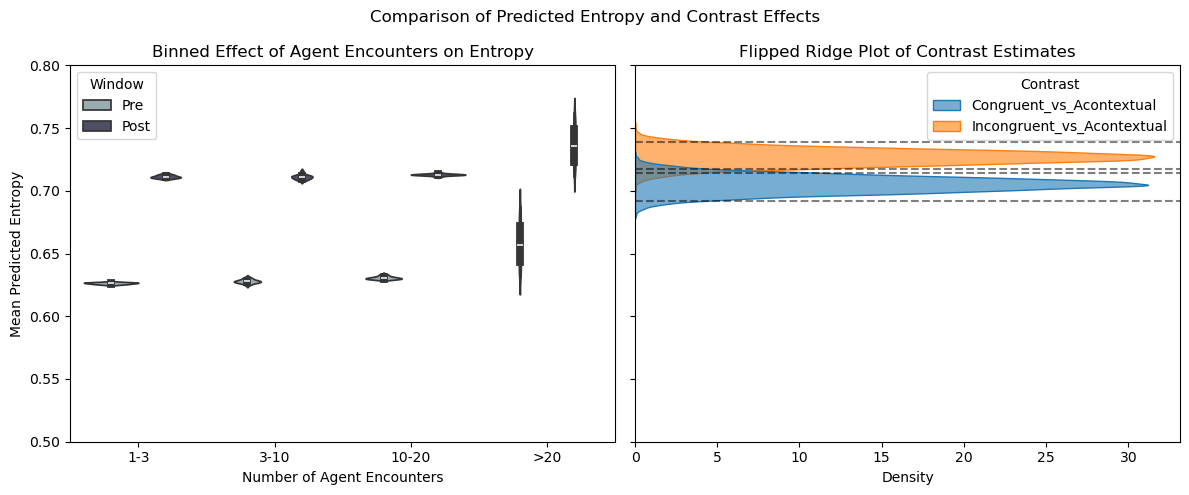

In [13]:


# Ensure Event_Bin and Pre_Post_Label are categorical with the correct order
bin_order = ["1-3", "3-10", "10-20", ">20"]
new_data["Event_Bin"] = pd.Categorical(new_data["Event_Bin"].replace({"0-3": "1-3"}), categories=bin_order, ordered=True)
new_data["Pre_Post_Label"] = pd.Categorical(new_data["Pre_Post_Label"], categories=["Pre", "Post"], ordered=True)

# Compute summary statistics for contrast data (if not done already)
summary_stats = contrast_data.groupby("Contrast")["Estimate_Response"].agg(
    mean="mean",
    lower=lambda x: np.percentile(x, 2.5),
    upper=lambda x: np.percentile(x, 97.5)
).reset_index()

# Create a figure with two side-by-side plots sharing the y-axis
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

### **📌 First Plot: Binned Effect of Agent Encounters on Entropy ###
sns.violinplot(
    data=new_data,
    x="Event_Bin",
    y="predicted_entropy",
    hue="Pre_Post_Label",
    palette="bone_r",  # Updated palette
    ax=axes[0],
    inner="box",
    dodge=True  # Ensure spacing is preserved for Pre/Post categories
)

# Customize first plot
axes[0].set_title("Binned Effect of Agent Encounters on Entropy")
axes[0].set_xlabel("Number of Agent Encounters")
axes[0].set_ylabel("Mean Predicted Entropy")
axes[0].set_ylim(0.5, 0.8)
axes[0].legend(title="Window")

### **📌 Second Plot: Flipped Ridge Plot (Density Plot of Posterior Distributions) ###
sns.kdeplot(
    data=contrast_data,
    y="Estimate_Response",  # Flipping X and Y
    hue="Contrast",
    fill=True,
    alpha=0.6,
    ax=axes[1]
)

# Add horizontal lines for 95% credible intervals
for _, row in summary_stats.iterrows():
    axes[1].axhline(y=row["lower"], linestyle="dashed", color="black", alpha=0.5)
    axes[1].axhline(y=row["upper"], linestyle="dashed", color="black", alpha=0.5)

# Customize second plot
axes[1].set_title("Flipped Ridge Plot of Contrast Estimates")
axes[1].set_ylabel("Effect on Normalized Entropy (0-1 Scale)")
axes[1].set_xlabel("Density")
#axes[1].legend(title="Contrast Type")

# Adjust layout for better visibility
plt.suptitle("Comparison of Predicted Entropy and Contrast Effects")
plt.tight_layout()

# Save the figure
plt.savefig("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/Combined_Entropy_Plots.png", dpi=900, bbox_inches="tight")

# Show the figure
plt.show()


/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_3406/1277034312.py:65: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend(title="Post-Window Contrast", fontsize=10, loc="upper right")


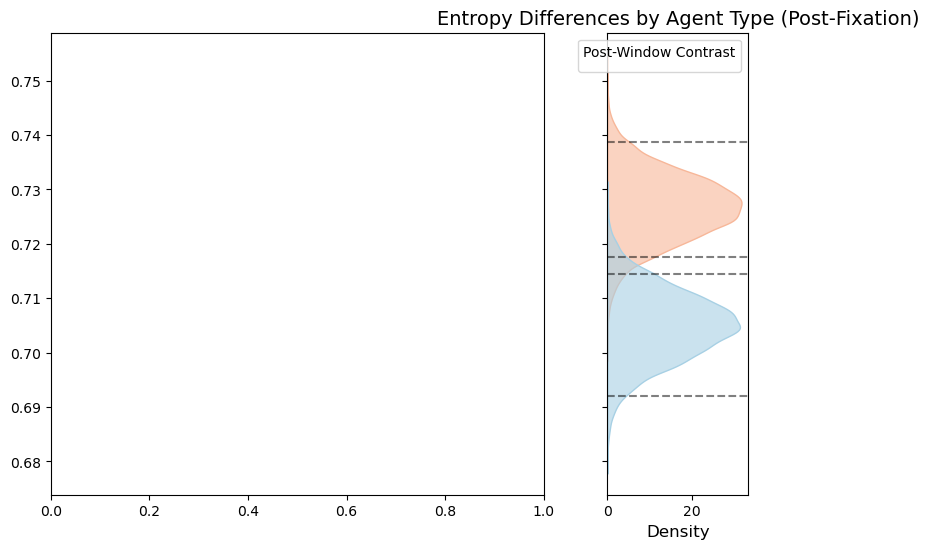

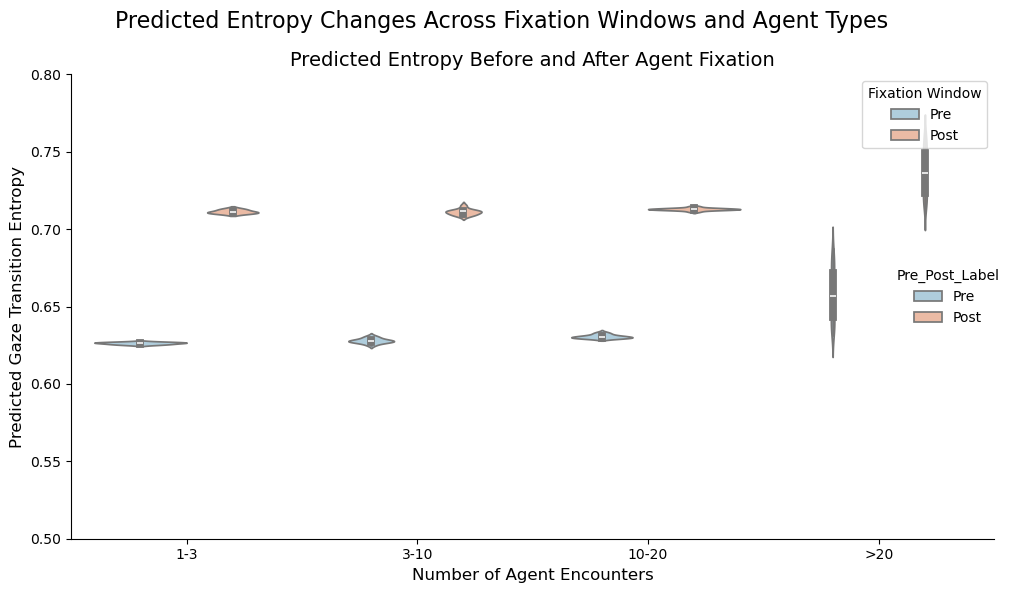

In [14]:
bin_order = ["1-3", "3-10", "10-20", ">20"]
new_data["Event_Bin"] = pd.Categorical(new_data["Event_Bin"].replace({"0-3": "1-3"}), categories=bin_order, ordered=True)
new_data["Pre_Post_Label"] = pd.Categorical(new_data["Pre_Post_Label"], categories=["Pre", "Post"], ordered=True)

# Compute summary statistics for contrast data
summary_stats = contrast_data.groupby("Contrast")["Estimate_Response"].agg(
    mean="mean",
    lower=lambda x: np.percentile(x, 2.5),
    upper=lambda x: np.percentile(x, 97.5)
).reset_index()
# Rename the levels in the "Contrast" column to just "Congruent" and "Incongruent"
contrast_data["Contrast"] = contrast_data["Contrast"].replace({
    "Congruent_vs_Acontextual": "Congruent",
    "Incongruent_vs_Acontextual": "Incongruent"
})

# Rename the "Contrast" column to "Post-Window Contrast"
contrast_data = contrast_data.rename(columns={"Contrast": "Post-Window Contrast"})





# Create a figure with customized widths (left plot 3.5x wider)
fig, axes = plt.subplots(1, 2, figsize=(9, 6), gridspec_kw={'width_ratios': [3.5, 1]}, sharey=True)

### **📌 First Plot: Using `sns.catplot()` Instead of `sns.violinplot()` ###
sns.catplot(
    data=new_data,
    x="Event_Bin",
    y="predicted_entropy",
    hue="Pre_Post_Label",
    kind="violin",  # Change this to "box" or "bar" for different styles
    palette="RdBu_r",
    height=6, aspect=1.5
)

# Customize first plot
plt.title("Predicted Entropy Before and After Agent Fixation", fontsize=14)
plt.xlabel("Number of Agent Encounters", fontsize=12)
plt.ylabel("Predicted Gaze Transition Entropy", fontsize=12)
plt.ylim(0.5, 0.8)
plt.legend(title="Fixation Window", fontsize=10, loc="upper right")

### **📌 Second Plot: Flipped Ridge Plot (Density Plot of Posterior Distributions) ###
sns.kdeplot(
    data=contrast_data,
    y="Estimate_Response",  # Flipping X and Y
    hue="Post-Window Contrast",
    palette="RdBu_r",
    fill=True,
    alpha=0.6,
    ax=axes[1]
)

# Add horizontal lines for 95% credible intervals
for _, row in summary_stats.iterrows():
    axes[1].axhline(y=row["lower"], linestyle="dashed", color="black", alpha=0.5)
    axes[1].axhline(y=row["upper"], linestyle="dashed", color="black", alpha=0.5)

# Customize second plot
axes[1].set_title("Entropy Differences by Agent Type (Post-Fixation)", fontsize=14)
axes[1].set_ylabel("Predicted Entropy Difference (Normalized)", fontsize=12)
axes[1].set_xlabel("Density", fontsize=12)
axes[1].legend(title="Post-Window Contrast", fontsize=10, loc="upper right")

# Adjust layout for better visibility
plt.suptitle("Predicted Entropy Changes Across Fixation Windows and Agent Types", fontsize=16)
plt.tight_layout()

# Save the figure
plt.savefig("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/Improved_Entropy_Plots.png", dpi=900, bbox_inches="tight")

# Show the figure
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:2761: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try violinplot
  warnings.warn(msg, UserWarning)
/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_3406/1614590521.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(title="Fixation Window", fontsize=10, loc="upper right")
/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_3406/1614590521.py:53: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend(title="Post-Window Contrast", fontsize=10, loc="upper right")


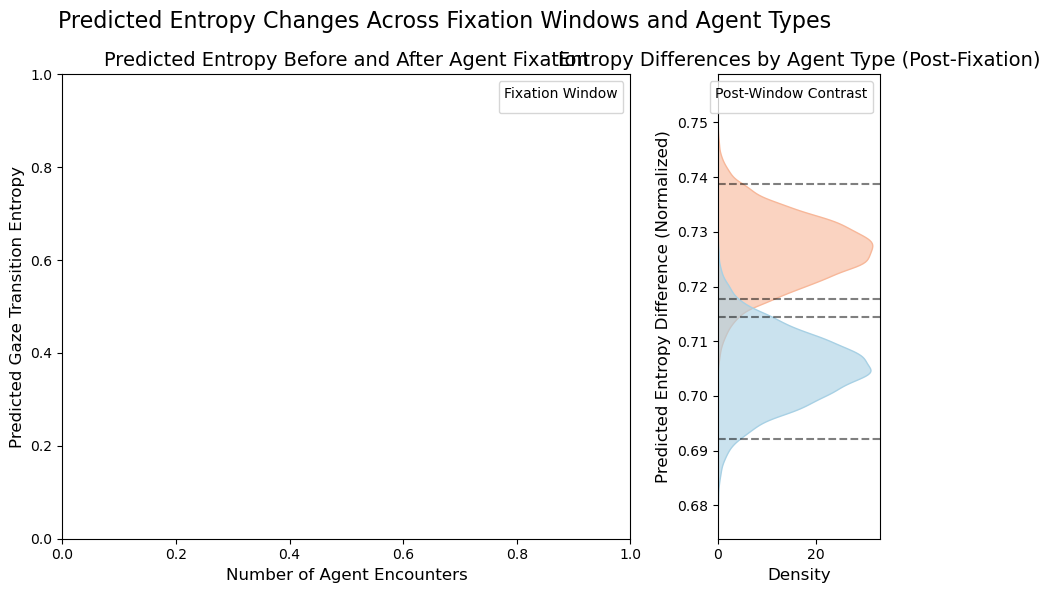

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with customized widths (left plot 3.5x wider)
fig = plt.figure(figsize=(9, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[3.5, 1])

# First Plot: Using sns.catplot() Instead of sns.violinplot()
ax1 = fig.add_subplot(gs[0])
g = sns.catplot(
    data=new_data,
    x="Event_Bin",
    y="predicted_entropy",
    hue="Pre_Post_Label",
    kind="violin",  # Change to "box" or "bar" for different styles
    palette="RdBu_r",
    height=6, aspect=1.5,
    ax=ax1  # Pass the created axis
)

# Customize first plot
ax1.set_title("Predicted Entropy Before and After Agent Fixation", fontsize=14)
ax1.set_xlabel("Number of Agent Encounters", fontsize=12)
ax1.set_ylabel("Predicted Gaze Transition Entropy", fontsize=12)
#ax1.set_ylim(0.5, 0.8)
ax1.legend(title="Fixation Window", fontsize=10, loc="upper right")

# Close redundant figures created by sns.catplot()
plt.close(2)
plt.close(3)

# Second Plot: Flipped Ridge Plot (Density Plot of Posterior Distributions)
ax2 = fig.add_subplot(gs[1])
sns.kdeplot(
    data=contrast_data,
    y="Estimate_Response",  # Flipping X and Y
    hue="Post-Window Contrast",
    palette="RdBu_r",
    fill=True,
    alpha=0.6,
    ax=ax2  # Pass the created axis
)

# Add horizontal lines for 95% credible intervals
for _, row in summary_stats.iterrows():
    ax2.axhline(y=row["lower"], linestyle="dashed", color="black", alpha=0.5)
    ax2.axhline(y=row["upper"], linestyle="dashed", color="black", alpha=0.5)

# Customize second plot
ax2.set_title("Entropy Differences by Agent Type (Post-Fixation)", fontsize=14)
ax2.set_ylabel("Predicted Entropy Difference (Normalized)", fontsize=12)
ax2.set_xlabel("Density", fontsize=12)
ax2.legend(title="Post-Window Contrast", fontsize=10, loc="upper right")

# Adjust layout for better visibility
plt.suptitle("Predicted Entropy Changes Across Fixation Windows and Agent Types", fontsize=16)
plt.tight_layout()

# Save the figure
plt.savefig("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/Polished_Entropy_Plots.png", dpi=900, bbox_inches="tight")

# Show the figure
plt.show()


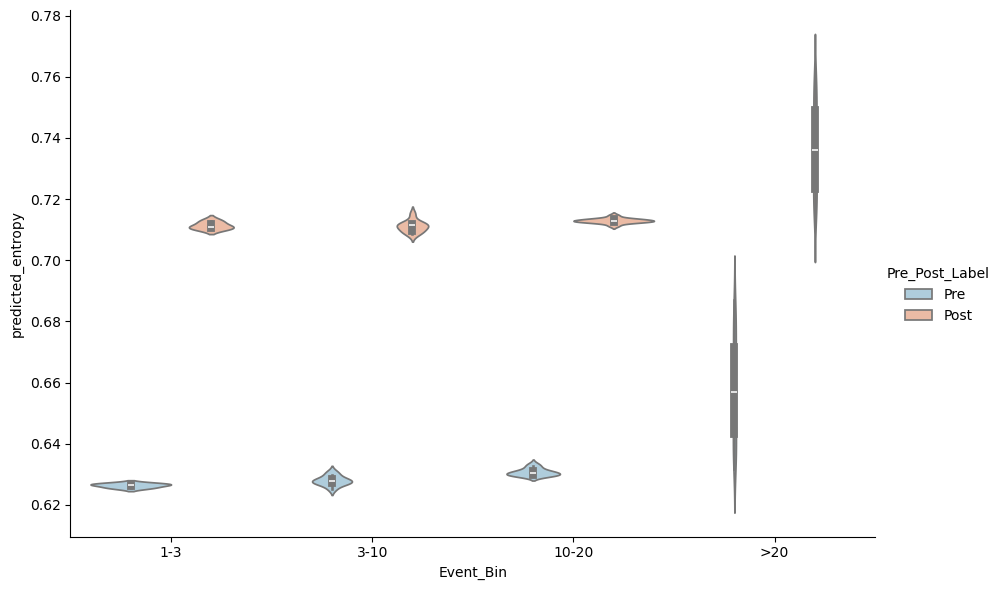

In [16]:
g = sns.catplot(
    data=new_data,
    x="Event_Bin",
    y="predicted_entropy",
    hue="Pre_Post_Label",
    kind="violin",  # Change to "box" or "bar" for different styles
    palette="RdBu_r",
    height=6, aspect=1.5)

/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_3406/1186403622.py:49: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend(title="Post-Window Contrast", fontsize=10, loc="upper right")


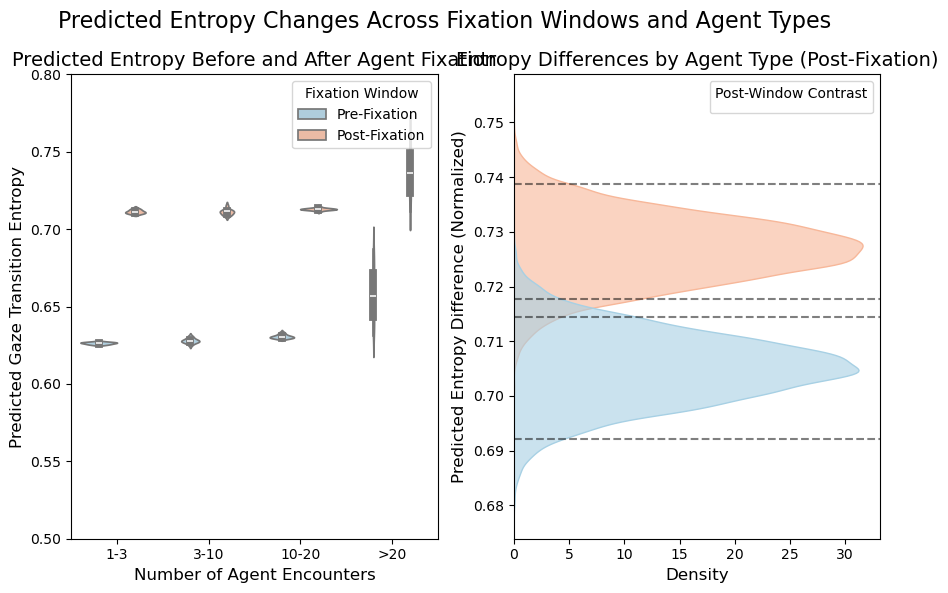

In [17]:
# Create figure and add subplots manually
fig = plt.figure(figsize=(9, 6))

ax1 = fig.add_subplot(121)  # Left panel: Binned entropy
ax2 = fig.add_subplot(122)  # Right panel: Posterior contrasts

### **📌 First Plot: Using `sns.catplot()` with `ax1` (Instead of `sns.violinplot()`) ###
g1 = sns.violinplot(
    data=new_data,
    x="Event_Bin",
    y="predicted_entropy",
    hue="Pre_Post_Label",
    palette="RdBu_r",
    ax=ax1  # Pass manually created axis
)

# Customize first plot
ax1.set_title("Predicted Entropy Before and After Agent Fixation", fontsize=14)
ax1.set_xlabel("Number of Agent Encounters", fontsize=12)
ax1.set_ylabel("Predicted Gaze Transition Entropy", fontsize=12)
ax1.set_ylim(0.5, 0.8)

# Adjust legend manually
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, ["Pre-Fixation", "Post-Fixation"], title="Fixation Window", fontsize=10, loc="upper right")



### **📌 Second Plot: Flipped Ridge Plot (Density Plot of Posterior Distributions) ###
g2 = sns.kdeplot(
    data=contrast_data,
    y="Estimate_Response",  # Flipping X and Y
    hue="Post-Window Contrast",
    palette="RdBu_r",
    fill=True,
    alpha=0.6,
    ax=ax2
)

# Add horizontal lines for 95% credible intervals
for _, row in summary_stats.iterrows():
    ax2.axhline(y=row["lower"], linestyle="dashed", color="black", alpha=0.5)
    ax2.axhline(y=row["upper"], linestyle="dashed", color="black", alpha=0.5)

# Customize second plot
ax2.set_title("Entropy Differences by Agent Type (Post-Fixation)", fontsize=14)
ax2.set_ylabel("Predicted Entropy Difference (Normalized)", fontsize=12)
ax2.set_xlabel("Density", fontsize=12)
ax2.legend(title="Post-Window Contrast", fontsize=10, loc="upper right")

# Adjust layout for better visibility
plt.suptitle("Predicted Entropy Changes Across Fixation Windows and Agent Types", fontsize=16)
plt.tight_layout()


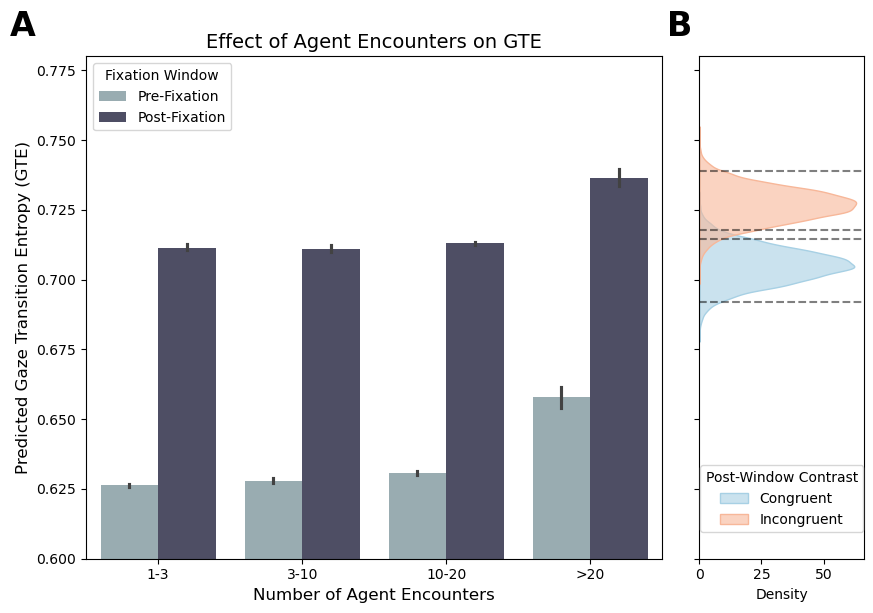

In [21]:

# 📌 Create figure with increased spacing between subplots
fig, axes = plt.subplots(1, 2, figsize=(9, 6), gridspec_kw={'width_ratios': [3.5, 1]}, sharey=True)

# **📌 Adjust subplot spacing**
plt.subplots_adjust(wspace=0.6)  # Increased spacing between the two plots

### **📌 First Plot: Violin Plot with Your Custom Palette and No Cut**
violin_parts = sns.barplot(
    data=new_data,
    x="Event_Bin",
    y="predicted_entropy",
    hue="Pre_Post_Label",
    palette="bone_r",  # ✅ Your custom palette
    ax=axes[0],
    #inner="box",
    #density_norm='width',
    #width=0.9,
    dodge=True
)

# **Set alpha (transparency) for each violin**
for violin in violin_parts.collections:
    violin.set_alpha(0.6)  # ✅ Your transparency setting

# Customize first plot
axes[0].set_title("Effect of Agent Encounters on GTE", fontsize=14)  # ✅ Your title
axes[0].set_xlabel("Number of Agent Encounters", fontsize=12)
axes[0].set_ylabel("Predicted Gaze Transition Entropy (GTE)", fontsize=12)
axes[0].set_ylim(0.6, 0.78)

# Adjust legend manually
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles, ["Pre-Fixation", "Post-Fixation"], title="Fixation Window", fontsize=10, loc="upper left")

### **📌 Second Plot: Flipped Ridge Plot (Density Plot of Posterior Distributions)**
palette = sns.color_palette("RdBu_r", n_colors=contrast_data["Post-Window Contrast"].nunique())

for i, (name, group) in enumerate(contrast_data.groupby("Post-Window Contrast")):
    sns.kdeplot(
        data=group,
        y="Estimate_Response",
        fill=True,
        alpha=0.6,
        label=name,  # 👈 ensures a label is attached
        ax=axes[1],
        color=palette[i]
    )

# Add horizontal lines for 95% credible intervals
for _, row in summary_stats.iterrows():
    axes[1].axhline(y=row["lower"], linestyle="dashed", color="black", alpha=0.5)
    axes[1].axhline(y=row["upper"], linestyle="dashed", color="black", alpha=0.5)
    
axes[1].legend(
    title="Post-Window Contrast",
    fontsize=10,
    loc="lower center",
    bbox_to_anchor=(0.5, 1.05),  # 👈 centered above the plot
    ncol=1,  # Or 2 if you want horizontal legend
)
# **📌 Push Y-axis label further to prevent overlap and reduce space to ticks**
axes[1].set_ylabel("", fontsize=12, labelpad=1)  # ✅ Reduced labelpad
# ✅ Grab handles and labels manually after the plot is created
handles2, labels2 = axes[1].get_legend_handles_labels()
axes[1].legend(
    handles=handles2,
    labels=labels2,
    title="Post-Window Contrast",
    fontsize=10,
    loc="upper center",          # stays relative to the anchor point
    bbox_to_anchor=(0.5, 0.2), # shift down below the subplot
    ncol=1
)


# **📌 Add "A" and "B" Annotations Above the Plots**
plt.figtext(0.01, 0.97, "A", fontsize=24, fontweight="bold", color="black")  # Above the Violin Plot
plt.figtext(0.74, 0.97, "B", fontsize=24, fontweight="bold", color="black")  # Above the KDE Plot

# Adjust layout for better visibility
plt.tight_layout()

# Save the figure
plt.savefig(
    "/Volumes/TwoTeras/Entropy_Paper/Raw_Entropy_Figures/Fig_6.png",
    dpi=900,
    bbox_inches="tight",
    pad_inches=0.25  # increase/decrease to taste (e.g., 0.1–0.5)
)

# Show the figure
plt.show()
